In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import scikitplot as skplt

# Multiple-choice questions

1. Elbow is the only method used for finding the optimal number of clusters for k-means clustering - FALSE
2. Decision Tree Classification results highly depend on homoscedasticity assumption being met - FALSE
3. Large difference between Train and Test set results for a given metric indicates signs of overfitting. - TRUE
4. One may overcome overfitting by hyperparameter optimization in case of Decision Tree - TRUE
5. Specificity is the percentage of true positives in real positives - FALSE
6. For k-fold cross-validation, larger values for k imply less bias and more variance. - TRUE
7. P-values of Decision Tree Classifier coefficients can be easily obtained but are not reliable. - FALSE
8. The Gini coefficient in the root (very first) node is calculated as 2*p*(1-p) for binary classification, where p is the percentage of 0s (or 1s) in the total dataset. - TRUE
9. Decision Tree Regression importance measure indicates the percentage of Gini index decrease resulting from the splits with the given feature - TRUE
10. Choose True if you want to have a bonus. - TRUE
11. Logistic Regression is a linear model used to predict a continuous output such as Customer Lifetime Value - FALSE
12. Recall (or Sensitivity) is the percentage of true positives in real positives - TRUE
13. Recall (or Sensitivity) is the percentage of true positives in predicted positives. - FALSE
14. Logistic Regression coefficients for continuous variables indicate the expected increase in probability of being 1 for a unit increase in a given numeric, continuous independent variable. - FALSE
15. A bonus question about Google, Python or Analytics is expected here - TRUE

In [2]:
data=pd.read_csv('default.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
data.shape

(1000, 21)

In [5]:
data.default.value_counts(normalize=True).mul(100).rename("Default distribution")

0    70.0
1    30.0
Name: Default distribution, dtype: float64

In [6]:
print("Missing values:", data.isna().sum().sum())

Missing values: 0


In [7]:
data.purpose.value_counts()

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
furniture/equipment              12
repairs                          12
retraining                        9
Name: purpose, dtype: int64

In [8]:
default_rate=data.groupby("purpose")["default"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

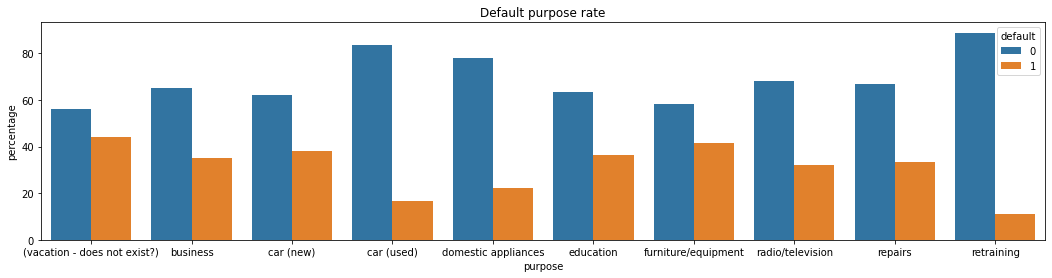

In [9]:
plt.figure(figsize=(18,4))
sns.barplot(x="purpose",y="percentage", hue="default",data=default_rate)
plt.title("Default purpose rate")
plt.show()

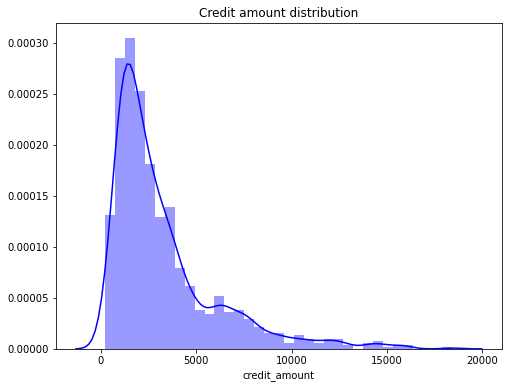

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(data.credit_amount,color="blue")
plt.title("Credit amount distribution")
plt.show()

In [11]:
data.credit_amount=np.where(data.credit_amount>3200,1,0)

In [12]:
print("duration_in_month median:",data.duration_in_month.median())
print("duration_in_month mean:",data.duration_in_month.mean())

duration_in_month median: 18.0
duration_in_month mean: 20.903


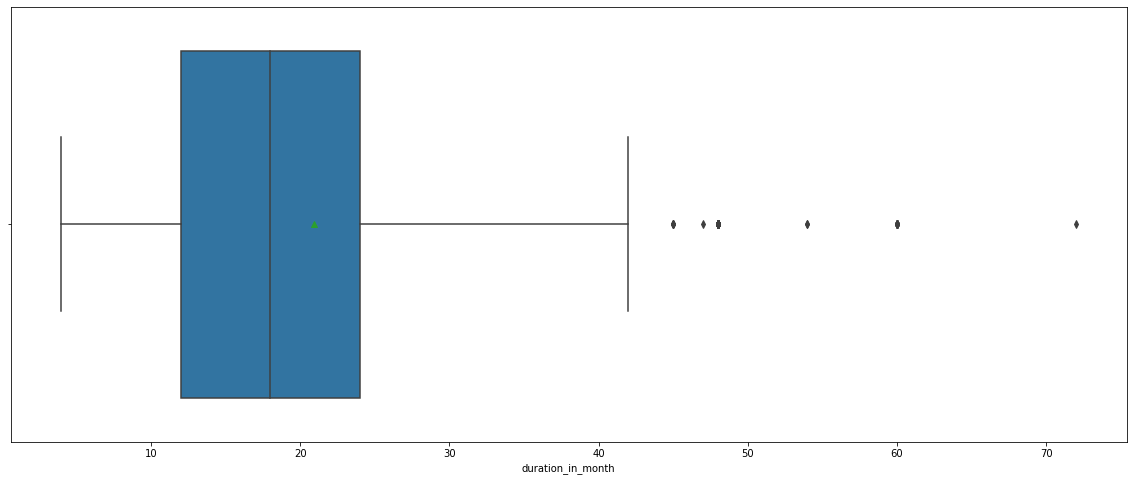

In [13]:
plt.figure(figsize=(20,8))
sns.boxplot(x="duration_in_month", data=data, showmeans=True)
plt.show()

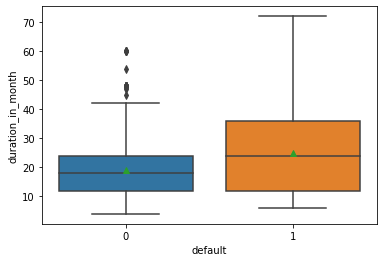

In [14]:
sns.boxplot(data=data,y='duration_in_month',x="default", showmeans=True)
plt.show()

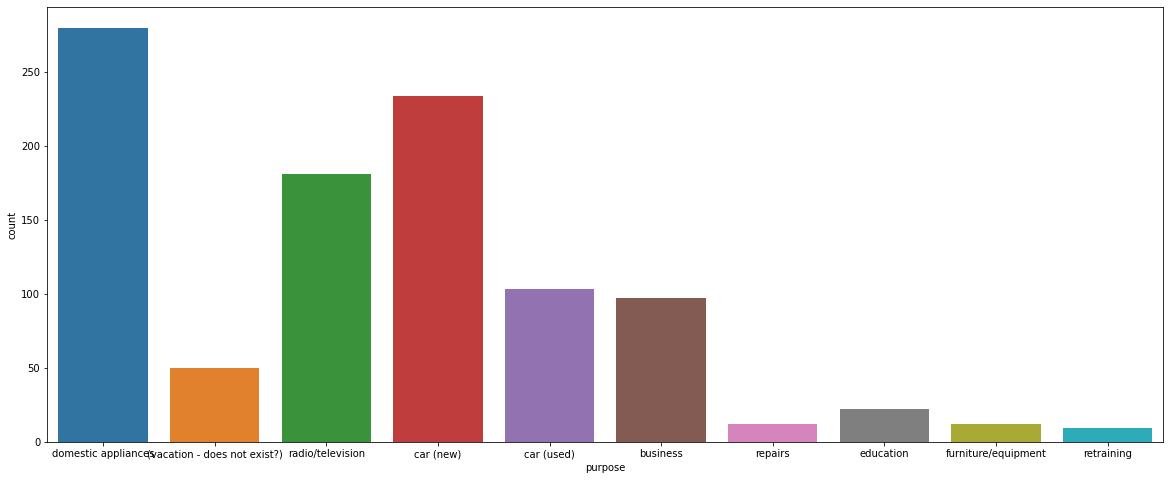

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x="purpose", data=data, orient="h")
plt.show()

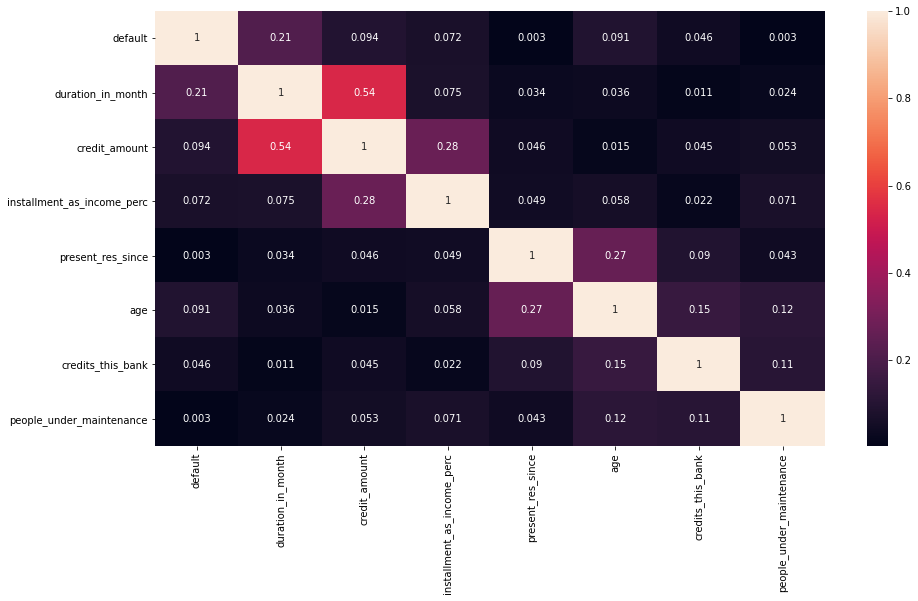

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

# Part 2

In [17]:
Y=data["default"]
X=data.drop("default",axis=1)

In [18]:
X=pd.get_dummies(X, drop_first=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [20]:
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [21]:
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0), columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

In [22]:
logit=LogisticRegression(C=0.003, class_weight=None, random_state=42).fit(X0_scaled,Y0)

In [23]:
Y0_logit=logit.predict_proba(X0_scaled)[:,1]
Y1_logit=logit.predict_proba(X1_scaled)[:,1]

In [24]:
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train: 0.8137645358607246
ROC_AUC Test: 0.7977528089887641


In [25]:
param_logit={'class_weight':[None,'balanced'],'C': np.linspace(0.001, 0.1,10)}
gs_logit=GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1).fit(X0_scaled,Y0)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [26]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.001, 'class_weight': 'balanced'}

In [27]:
logit_grid=LogisticRegression(C=best_params_logit['C'], class_weight=best_params_logit['class_weight'],
                              random_state=42).fit(X0_scaled,Y0)


Y0_logit=logit_grid.predict_proba(X0_scaled)[:,1]
Y1_logit=logit_grid.predict_proba(X1_scaled)[:,1]


Y0_logit_bin=np.where(Y0_logit>0.5,1,0) # logit_grid.predict(X0_scaled)
Y1_logit_bin=np.where(Y1_logit>0.5,1,0)

In [28]:
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_logit))
print("Recall Train:",recall_score(Y0, Y0_logit_bin))
print("Recall Test:",recall_score(Y1, Y1_logit_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_logit_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_logit_bin))

ROC_AUC Train: 0.808740001344357
ROC_AUC Test: 0.7941635455680399
Recall Train: 0.7719298245614035
Recall Test: 0.75
Accuracy Train: 0.7373333333333333
Accuracy Test: 0.716


# DecisionTreeClassifier

In [29]:
dt1=DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=200).fit(X0,Y0)

In [30]:
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]

In [31]:
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))

ROC_AUC Train: 0.7073376688848558
ROC_AUC Test: 0.7349016853932584


In [32]:
param_dt={"max_depth":range(2,5),"min_samples_leaf":range(10,100,10),"class_weight":["balanced", None]}

In [33]:
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt, 
                   scoring="roc_auc", cv=5, n_jobs=-1)
gs_dt.fit(X0,Y0)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(10, 100, 10)},
             scoring='roc_auc')

In [34]:
best_params = gs_dt.best_params_
best_params

{'class_weight': None, 'max_depth': 4, 'min_samples_leaf': 80}

In [35]:
dt1=DecisionTreeClassifier(random_state=42, class_weight=best_params['class_weight'], 
                    max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf']).fit(X0,Y0)

In [36]:
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]

Y0_dt_grid_bin=np.where(Y0_dt_grid>0.5,1,0)
Y1_dt_grid_bin=np.where(Y1_dt_grid>0.5,1,0)

In [37]:
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))
print("Recall Train:",recall_score(Y0, Y0_dt_grid_bin))
print("Recall Test:",recall_score(Y1, Y1_dt_grid_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_dt_grid_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_dt_grid_bin))

ROC_AUC Train: 0.7427740807958594
ROC_AUC Test: 0.7409098002496879
Recall Train: 0.23684210526315788
Recall Test: 0.2361111111111111
Accuracy Train: 0.7253333333333334
Accuracy Test: 0.732


In [39]:
dt1.feature_importances_

array([0.2383406 , 0.        , 0.        , 0.        , 0.01851997,
       0.        , 0.        , 0.        , 0.        , 0.63323383,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03548126, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07442434, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [40]:
feat_imp=pd.DataFrame(dt1.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head(5)

,Feature_imp
account_check_status_no checking account,0.633234
duration_in_month,0.238341
property_real estate,0.074424
purpose_domestic appliances,0.035481
age,0.018520
